# OCR 

Diese Skript demonstriert wie anhand einer eingescannten Beispielrechnung mittels OCR die nur für den Förderbankengenehmigungsprozess relveanten Details ausgelesen werden können und mit digitalen Angaben aus z.B einer Datenbank abgeglichen werden können.

In [ ]:
#Wir installieren die nötigen Pakete 

!pip install torch torchvision torchaudio  
!pip install easyocr
!pip install "opencv-python-headless<4.3"
!pip install pandas

     |████████████████████████████████| 63.6 MB 56 kB/s 
     |████████████████████████████████| 47.8 MB 90 kB/s 
     |████████████████████████████████| 21.6 MB 1.4 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
#und importieren sie


import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

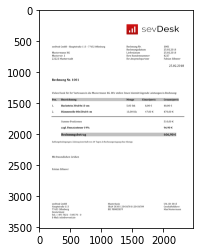

In [ ]:
#Wir bilden die Rechnung die wir auslesen möchten ab und definieren den Dateipfad des Photos.


img = mpimg.imread('/content/1Beispielrechnung.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#Wir lesen die Rechnung mit dem OCR Easy OCR Paket aus. 

array = easyocr.Reader(['de'], gpu=True)
array = array.readtext(img, detail=0)
array #und drucken diese

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['sevDesk',
 'sevDesk GmbH',
 'Hauptstraße 115',
 '=',
 '77652 Offenburg',
 'Rechnung Nr.',
 '1001',
 'Rechnungsdatum',
 '25.02.2018',
 'Mustermann KG',
 'Lieferdatum',
 '25.02.2018',
 'Musterstr. 1',
 'Ihre Kundennummer',
 '4227',
 '22222 Musterstadt',
 'Ihr Ansprechpartner',
 'Fabian Silberer',
 '25.02.2018',
 'Rechnung Nr. 1001',
 'Vielen Dank für Ihr Vertrauen in die Mustermann KG. Wir stellen Ihnen hiermit folgende Leistungen in Rechnung:',
 'Pos.',
 'Bezeichnung',
 'Menge',
 'Einzelpreis',
 'Gesamtpreis',
 '1',
 'Backstein 3Oxl0xlO cm',
 '5,00 Stk',
 '8,00 €',
 '40,00 €',
 '2',
 'Dämmwolle 8Ox50x10 cm',
 '10,00 Stk',
 '47,00 €',
 '470,00 €',
 'Summe Positionen',
 '510,00 €',
 'zzgl. Umsatzsteuer 19%',
 '96,90 €',
 'Rechnungsbetrag',
 '606,90 €',
 'Zahlungsbedingungen: Zahlung innerhalb von 14 Tagen ab Rechnungseingang ohne Abzüge:',
 'Mit freundlichen Grüßen',
 'Fabian Silberer',
 'sevDesk GmbH',
 'Musterbank',
 'USt.-ID: 0815',
 'Hauptstraße 115',
 'IBAN DE 85 12345678 012345678

In [ ]:
array = ['sevDesk',   #wir legen den Output des OCR nochmal seperat an , damit wir die Rechnung nicht immer wieder seerat auslesen müssen
 'sevDesk GmbH',
 'Hauptstraße 115',
 '=',
 '77652 Offenburg',
 'Rechnung Nr.',
 '1001',
 'Rechnungsdatum',
 '25.02.2018',
 'Mustermann KG',
 'Lieferdatum',
 '25.02.2018',
 'Musterstr. 1',
 'Ihre Kundennummer',
 '4227',
 '22222 Musterstadt',
 'Ihr Ansprechpartner',
 'Fabian Silberer',
 '25.02.2018',
 'Rechnung Nr. 1001',
 'Vielen Dank für Ihr Vertrauen in die Mustermann KG. Wir stellen Ihnen hiermit folgende Leistungen in Rechnung:',
 'Pos.',
 'Bezeichnung',
 'Menge',
 'Einzelpreis',
 'Gesamtpreis',
 '1',
 'Backstein 3Oxl0xlO cm',
 '5,00 Stk',
 '8,00 €',
 '40,00 €',
 '2',
 'Dämmwolle 8Ox50x10 cm',
 '10,00 Stk',
 '47,00 €',
 '470,00 €',
 'Summe Positionen',
 '510,00 €',
 'zzgl. Umsatzsteuer 19%',
 '96,90 €',
 'Rechnungsbetrag',
 '606,90 €',
 'Zahlungsbedingungen: Zahlung innerhalb von 14 Tagen ab Rechnungseingang ohne Abzüge:',
 'Mit freundlichen Grüßen',
 'Fabian Silberer',
 'sevDesk GmbH',
 'Musterbank',
 'USt.-ID: 0815',
 'Hauptstraße 115',
 'IBAN DE 85 12345678 0123456789',
 'Geschäftsführer:',
 '77653 Offenburg',
 'BIC PBNKDEFF',
 'Max Mustermann',
 'Deutschland',
 'Tel: (+49) 7821',
 '549370 - 0',
 'E-Mail: info@sevenitde']

# Validierung

Der Algorithm liest nun die Liste nach relevanten Elementen aus. Dafür  loopen wir durch die Liste und sobald wir auf das Wort "Bezeichnung, Produkt, Titel oder Beschreibung treffen fangen wir an dieses und jedes Wort was dannach kommmt herauszufiltern bis wir auf das Wort Summe Positionen, Zw. Summe, Summe Netto oder Summe Nettoberträge treffen. Bei einem dieser Wörter beenden Wir dann den Filterungsprozess

In [ ]:

good_indices = [index for index, item in enumerate(
    array) if item == '1' or item =='2'or item == 'Bezeichnung.' or item == "Produkt" or item == "Bezeichnung" or item == "Titel" or item == "Beschreibung" or item == "Summe Positionen" or item == "Zw. summe" or item == "Summe netto" or item == "Summe Nettobetröge"]

items_to_save = []

for index, item in enumerate(array):
    if index >= min(good_indices) and index <= max(good_indices):
        items_to_save.append(item)

print(items_to_save)

['Bezeichnung', 'Menge', 'Einzelpreis', 'Gesamtpreis', '1', 'Backstein 3Oxl0xlO cm', '5,00 Stk', '8,00 €', '40,00 €', '2', 'Dämmwolle 8Ox50x10 cm', '10,00 Stk', '47,00 €', '470,00 €', 'Summe Positionen']


Wir werden jetzt folgenden Versuch unternehmen. Wir wollen die gefilterte Liste in einen Dataframe konvertieren. Dafür sagen wir dass Wörter die einem von mehreren String entsprechen die Spalten des Datframes bilden. Die Wörter die dann übrig bleiben werden die Reihen befüllen je nach Position.

In [ ]:
df = pd.DataFrame() #wir erstellen eine Datenframe, wo unsere Liste später reinkommt

In [ ]:
if [x for x in items_to_save if x in ['Bezeichnung','Artikel','BEZEICHNUNG','ARTIKEL','Produkt','PRODUKT']]:
  df['Beschreibung'] = 'nn' and items_to_save.remove("Bezeichnung" or "Artikel" or "BEZEICHNUNG" or "ARTIKEL" or "Produkt" or "PRODUKT")
else: 
  pass   #if our list contains one of these words we create an equivalent colument in a new df and delelte the corresponding word from the list 
if [x for x in items_to_save if x in ['Menge','Anzahl','MENGE','ANZAHL']]:
  df['Menge'] = 'nn' and items_to_save.remove("Menge" or "MENGE" or "Anzahl" or "ANZAHL")
else: 
  pass
if [x for x in items_to_save if x in ['Einzelpreis','EINZELPREIS']]:
  df['Einzelpreis'] = 'nn' and items_to_save.remove("Einzelpreis" or "EINZELPREIS")
else: 
  pass
if [x for x in items_to_save if x in ['Gesamtpreis','Gesamtpreis']]:
  df['Gesamtpreis'] = 'nn' and items_to_save.remove("Gesamtpreis" or "Gesamtpreis")
else: 
  pass

In [ ]:
df

,Beschreibung,Menge,Einzelpreis,Gesamtpreis


In [ ]:
items_to_save

['1',
 'Backstein 3Oxl0xlO cm',
 '5,00 Stk',
 '8,00 €',
 '40,00 €',
 '2',
 'Dämmwolle 8Ox50x10 cm',
 '10,00 Stk',
 '47,00 €',
 '470,00 €',
 'Summe Positionen']

In [ ]:
#hier müssen wir tricksen da noch strings in der liste sind, die wir nicht brauchen. Diese entfernen wir jetzt individuell von der liste

items_to_save.remove("1")
items_to_save.remove("2")
items_to_save.remove("Summe Positionen")
items_to_save

['Backstein 3Oxl0xlO cm',
 '5,00 Stk',
 '8,00 €',
 '40,00 €',
 'Dämmwolle 8Ox50x10 cm',
 '10,00 Stk',
 '47,00 €',
 '470,00 €']

Um die Liste nun mit unsere Dataframe zu verbinden, müssen wir unsere Liste zunächst in zwei Unterlisten mit der gleichen Anzahl an Elementen pro Unterliste wie Spalten in unserem DF aufteilen

In [ ]:
len(df.columns)

result_list = []
new_list = []
my_columns = len(df.columns)
for i, elem in enumerate(items_to_save):
    if i % my_columns != 0:
        new_list.append(elem)
    else:
        new_list = []
        new_list.append(elem)
        result_list.append(new_list)
print(result_list)

[['Backstein 3Oxl0xlO cm', '5,00 Stk', '8,00 €', '40,00 €'], ['Dämmwolle 8Ox50x10 cm', '10,00 Stk', '47,00 €', '470,00 €']]


In [ ]:
df = df.append(pd.DataFrame(result_list, columns=df.columns), ignore_index=True)
df

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 3Oxl0xlO cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 8Ox50x10 cm,"10,00 Stk","47,00 €","470,00 €"


Jetzt erstellen wir einen zweiten Df der die Angaben im Portal simulieren sollen, welche wir dann mit unseren ausgelesenen Rechnungselementen abgleichen.

In [ ]:
# assign data of lists.  
data = {'Beschreibung': ['Backstein 30x10x10cm', 'Dämmwolle 80x50x10cm'], 'Menge': ['5,00 Stk','10,00 Stk'], 'Einzelpreis': ['8,00 €','47,00 €'],'Gesamtpreis': ['40,00 €','470,00 €']}  
  
# Create DataFrame  
df2 = pd.DataFrame(data)  
  
# Print the output.  
df2  

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 30x10x10cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 80x50x10cm,"10,00 Stk","47,00 €","470,00 €"


Wir überprüfen jetzt die beiden Dataframes um zuschauen ob sie identisch sind. 
Eigentlich sollten wir aufgrund der OCR Fehler mit Fuzzy Matching arbeiten, damit Elemente wie z.B ein "O" dass mit einer Null verwechselt wird, nicht zu einer Warnmeldung führen. Der Einfachheit halber arbeiten wir aber hier mit Exact Matching. 

In [ ]:
df_diff = pd.concat([df,df2])
df_diff = df_diff.drop_duplicates(subset=None, keep=False, inplace=False, ignore_index=False)

if df_diff.empty:
  print("Angaben identisch")
else:
  print("Angaben nicht identsch, Bitte manuell überprüfen")

Anhaben nicht identsch, Bitte manuell überprüfen


In [ ]:
df_diff

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 3Oxl0xlO cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 8Ox50x10 cm,"10,00 Stk","47,00 €","470,00 €"
0,Backstein 30x10x10cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 80x50x10cm,"10,00 Stk","47,00 €","470,00 €"


Wir versuchen es auch für ein Szenario wo die beiden Tabellen genau übereinstimmen.

In [ ]:
# assign data of lists.  
data1 = {'Beschreibung': ['Backstein 3Oxl0xlO cm', 'Dämmwolle 8Ox50x10 cm'], 'Menge': ['5,00 Stk','10,00 Stk'], 'Einzelpreis': ['8,00 €','47,00 €'],'Gesamtpreis': ['40,00 €','470,00 €']}  
  
# Create DataFrame  
df3 = pd.DataFrame(data1)  
  
# Print the output.  
df3

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 3Oxl0xlO cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 8Ox50x10 cm,"10,00 Stk","47,00 €","470,00 €"


In [ ]:
df_diff

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 3Oxl0xlO cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 8Ox50x10 cm,"10,00 Stk","47,00 €","470,00 €"
0,Backstein 30x10x10cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 80x50x10cm,"10,00 Stk","47,00 €","470,00 €"


In [ ]:
df_diff = pd.concat([df,df3])
df_diff = df_diff.drop_duplicates(subset=None, keep=False, inplace=False, ignore_index=False)

if df_diff.empty:
  print("Angaben identisch")
else:
  print("Angaben nicht identsch, Bitte manuell überprüfen")

Angaben identisch


Dies mal waren die Angaben perfekt identisch und der Algorithmus hat es erkannt.

**Fehler die noch behoben werden müssen für eine bessere Funktionalität:**

*   Fehler des OCR entweder durch ein anderes OCR Paket oder später mit Fuzzy Matching beheben
*   Rechnungen die nicht mit der Bezeichnung sondern beispielsweise mit der Menge beginnen. Dies kann aber mit einer IF condition behoben werden
*   Es sind manchmal Nummern in der Rechnungen, die wir bisher manuell rausfiltern mussten und die lediglich als Index dienen. Dieses müssten automatisch rausgefiltert und entfernt werden. Ich weiss noch nicht wie. 
* wenn fehlerhafter OCR Output verwendet werden muss, muss bei dem Abgleich Fuzzy Matching verwendet werden, sonst kommt es zu Fehlermeldungen bei z.B Verwechselungen von einer Null und 0 oder bei Angaben wie der Stückzahl, Leerzeichen oder Verwendung von Eurozeichen

* Statisches Programmieren birgt immer Risiken von Ausnahmen auf dir wir nicht vorbereitet sind


# Fuzzy Matching Ansatz

um fehler 4 zu beheben

In [ ]:
df_diff = pd.concat([df,df2])
df_diff

,Beschreibung,Menge,Einzelpreis,Gesamtpreis
0,Backstein 3Oxl0xlO cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 8Ox50x10 cm,"10,00 Stk","47,00 €","470,00 €"
0,Backstein 30x10x10cm,"5,00 Stk","8,00 €","40,00 €"
1,Dämmwolle 80x50x10cm,"10,00 Stk","47,00 €","470,00 €"


In [ ]:
def remove_duplicates_inplace(df_diff, groupby=[], similarity_field='', similar_level=85):
    def check_simi(d):
        dupl_indexes = []
        for i in range(len(d.values) - 1):
            for j in range(i + 1, len(d.values)):
                if fuzz.token_sort_ratio(d.values[i], d.values[j]) >= similar_level:
                    dupl_indexes.append(d.index[j])

        return dupl_indexes

    indexes = df.groupby(groupby)[similarity_field].apply(check_simi)

    for index_list in indexes:
        df.drop(index_list, inplace=True)

In [ ]:
df_diff = remove_duplicates_inplace(df_diff, groupby=[], similarity_field='Beschreibung')
df_diff

ValueError: ignored

In [ ]:
df_diff

# Inhaltliche Klärung

In [ ]:
Hier könntest du weitermachen Lukas